# Problem Statement
###### Predict outlet sales for the bigmart compant. Data is provided by analytics vidhya

In [214]:
#data processing libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#modelling libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

#magic function
%matplotlib inline 


In [156]:
#read the datasets
train = pd.read_csv("train_v9rqX0R.csv")
test = pd.read_csv("test_AbJTz2l.csv")
sample_sub = pd.read_csv("sample_submission_8RXa3c6.csv")

#make a copy
train_orig = train.copy()
test_orig = test.copy()
sample_sub_orig = sample_sub.copy()

In [157]:
train.shape, test.shape, sample_sub.shape

((8523, 12), (5681, 11), (5681, 3))

In [158]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [159]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [160]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


In [161]:
display(train.columns.difference(test.columns), test.columns.difference(train.columns),\
train.columns.difference(sample_sub.columns), sample_sub.columns.difference(train.columns))

Index(['Item_Outlet_Sales'], dtype='object')

Index([], dtype='object')

Index(['Item_Fat_Content', 'Item_MRP', 'Item_Type', 'Item_Visibility',
       'Item_Weight', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Size', 'Outlet_Type'],
      dtype='object')

Index([], dtype='object')

In [162]:
train.index, test.index, sample_sub.index

(RangeIndex(start=0, stop=8523, step=1),
 RangeIndex(start=0, stop=5681, step=1),
 RangeIndex(start=0, stop=5681, step=1))

In [163]:
#check duplicates
print(train.duplicated().sum(),
    test.duplicated().sum(),
    sample_sub.duplicated().sum())

0 0 0


In [164]:
train["source"]="train"
test["source"]="test"
data = pd.concat([train,test])
data = data.reset_index().drop(columns="index")

In [165]:
data.shape

(14204, 13)

In [166]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [167]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [168]:
data[["Item_Weight","Outlet_Size"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Item_Weight  11765 non-null  float64
 1   Outlet_Size  10188 non-null  object 
dtypes: float64(1), object(1)
memory usage: 222.1+ KB


In [169]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
source                           2
dtype: int64

In [170]:
[display(data[i].value_counts()) for i in data.columns if data[i].nunique() <20]

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

train    8523
test     5681
Name: source, dtype: int64

[None, None, None, None, None, None, None, None]

In [171]:
#data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}).value_counts()
print(data['Item_Fat_Content'].value_counts())
data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)
print(data['Item_Fat_Content'].value_counts())

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [172]:
data["Outlet_Age"] = 2021 - data["Outlet_Establishment_Year"]

In [173]:
del data["Outlet_Establishment_Year"]

In [174]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,train,22
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,train,12
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,train,22
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,train,23
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,train,34


In [175]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800
Outlet_Age,14204.0,23.169319,8.371664,12.000,17.000000,22.000000,34.000000,36.000000


In [176]:
data.describe(exclude=np.number).T

,count,unique,top,freq
Item_Identifier,14204,1559,FDJ58,10
Item_Fat_Content,14204,2,Low Fat,9185
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,10188,3,Medium,4655
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294
source,14204,2,train,8523


In [177]:
#######
def using_dummy_val()

SyntaxError: invalid syntax (<ipython-input-177-c9112df4b819>, line 2)

In [178]:
x=data.copy()

In [179]:
print("Mode=",data['Outlet_Size'].mode()[0])
print("Null=",data['Outlet_Size'].isna().sum(),"\n", data['Outlet_Size'].value_counts())
data['Outlet_Size'].fillna(value=data['Outlet_Size'].mode()[0],inplace=True)
print("Null=",data['Outlet_Size'].isna().sum(),"\n", data['Outlet_Size'].value_counts())

Mode= Medium
Null= 4016 
 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
Null= 0 
 Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64


In [180]:
print("Median=",data['Item_Weight'].median())
print("Null=",data['Item_Weight'].isna().sum())
data['Item_Weight'].fillna(value=data['Item_Weight'].median(),inplace=True)
data['Item_Weight'].median()
print("Null=",data['Item_Weight'].isna().sum())

Median= 12.6
Null= 2439
Null= 0


In [181]:
data[data['Item_Visibility']==0].count()['Item_Visibility']

879

In [182]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales', 'source',
       'Outlet_Age'],
      dtype='object')

In [183]:
data.isna().sum()

Item_Identifier            0
Item_Weight                0
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size                0
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales       5681
source                     0
Outlet_Age                 0
dtype: int64

In [184]:
data.select_dtypes(include = np.number).corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
Item_Weight,1.000000,-0.015366,0.033008,0.009693,-0.012448
Item_Visibility,-0.015366,1.000000,-0.006351,-0.128625,0.083678
Item_MRP,0.033008,-0.006351,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.009693,-0.128625,0.567574,1.000000,0.049135
Outlet_Age,-0.012448,0.083678,-0.000141,0.049135,1.000000


<AxesSubplot:>

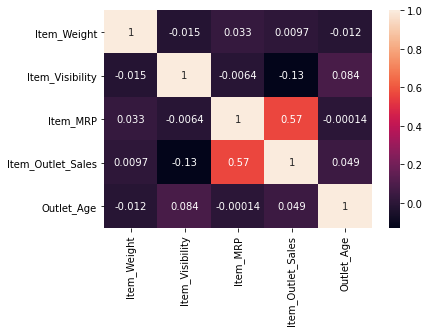

In [185]:
sns.heatmap(data.select_dtypes(include = np.number).corr(), annot=True)

In [186]:
data.select_dtypes(include = np.number)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age
0,9.30,0.016047,249.8092,3735.1380,22
1,5.92,0.019278,48.2692,443.4228,12
2,17.50,0.016760,141.6180,2097.2700,22
3,19.20,0.000000,182.0950,732.3800,23
4,8.93,0.000000,53.8614,994.7052,34
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,NaN,24
14200,7.60,0.142991,169.1448,NaN,12
14201,10.00,0.073529,118.7440,NaN,19
14202,15.30,0.000000,214.6218,NaN,14


In [187]:
numeric_data_columns = data.select_dtypes(include = np.number).drop(columns = "Item_Outlet_Sales").columns

In [188]:
numeric_data_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age'], dtype='object')

In [189]:
data.select_dtypes(exclude = np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,Medium,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,Medium,Tier 2,Supermarket Type1,test


In [190]:
category_data_columns = data.select_dtypes(exclude = np.number).drop(columns=["Item_Identifier","source"]).columns

In [191]:
category_data_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [192]:
preprocess_category_data_columns = pd.get_dummies(data[category_data_columns])

In [193]:
scaler = StandardScaler()

In [194]:
preprocess_numeric_data_columns = pd.DataFrame(scaler.fit_transform(data[numeric_data_columns]), columns=numeric_data_columns)

In [195]:
preprocess_category_data_columns.shape, preprocess_numeric_data_columns.shape, data[["Item_Identifier","Outlet_Identifier","source", "Item_Outlet_Sales"]].shape

((14204, 38), (14204, 4), (14204, 4))

In [196]:
preprocess_category_data_columns.index, preprocess_numeric_data_columns.index, data[["Item_Identifier","Outlet_Identifier","source", "Item_Outlet_Sales"]].index

(RangeIndex(start=0, stop=14204, step=1),
 RangeIndex(start=0, stop=14204, step=1),
 RangeIndex(start=0, stop=14204, step=1))

In [197]:
print('category=',preprocess_category_data_columns.shape[0], preprocess_category_data_columns.index.duplicated().sum())
print('Numeric=',preprocess_numeric_data_columns.shape[0], preprocess_numeric_data_columns.index.duplicated().sum())
print('Data=',data.shape[0],data.index.duplicated().sum())

category= 14204 0
Numeric= 14204 0
Data= 14204 0


In [198]:
preprocess_category_data_columns.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [199]:
preprocess_numeric_data_columns.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age
0,-0.816997,-0.969852,1.752511,-0.139681
1,-1.615164,-0.907063,-1.493696,-1.334228
2,1.119385,-0.956000,0.009874,-0.139681
3,1.520830,-1.281712,0.661838,-0.020226
4,-0.904370,-1.281712,-1.403623,1.293777


In [200]:
final_preprocessed = pd.concat([preprocess_category_data_columns, preprocess_numeric_data_columns, \
                               data[["Item_Identifier","Outlet_Identifier","source", "Item_Outlet_Sales"]]], axis=1)

In [201]:
final_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier,source,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,0,-0.816997,-0.969852,1.752511,-0.139681,FDA15,OUT049,train,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,1,0,-1.615164,-0.907063,-1.493696,-1.334228,DRC01,OUT018,train,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1.119385,-0.956000,0.009874,-0.139681,FDN15,OUT049,train,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,0,1.520830,-1.281712,0.661838,-0.020226,FDX07,OUT010,train,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,0,-0.904370,-1.281712,-1.403623,1.293777,NCD19,OUT013,train,994.7052


In [202]:
train_preprocessed = final_preprocessed[final_preprocessed["source"]=="train"].drop(columns = ["source"])
test_preprocessed = final_preprocessed[final_preprocessed["source"]=="test"].drop(columns = ["source","Item_Outlet_Sales"])

In [203]:
train_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,-0.816997,-0.969852,1.752511,-0.139681,FDA15,OUT049,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,-1.615164,-0.907063,-1.493696,-1.334228,DRC01,OUT018,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1.119385,-0.956000,0.009874,-0.139681,FDN15,OUT049,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1.520830,-1.281712,0.661838,-0.020226,FDX07,OUT010,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,-0.904370,-1.281712,-1.403623,1.293777,NCD19,OUT013,994.7052


In [204]:
test_preprocessed.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier,Outlet_Identifier
8523,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1.886853,-1.134699,-0.533831,-0.139681,FDW58,OUT049
8524,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,-1.053141,-0.534917,-0.864708,-1.095319,FDW14,OUT017
8525,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.434567,0.653405,1.622763,-0.020226,NCN55,OUT010
8526,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1.285743,-0.982657,0.225966,-1.095319,FDQ58,OUT017
8527,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,-0.037721,1.023121,1.501577,1.532686,FDY38,OUT027


In [205]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,test
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,test
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,test
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,test


In [206]:
model = LinearRegression()

In [207]:
X = train_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])
y = train_preprocessed["Item_Outlet_Sales"]

In [209]:
model.fit(X,y)

LinearRegression()

In [210]:
mean_squared_error(y, model.predict(X),squared=False)

1127.0443273163125

In [215]:
score = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')
np.mean(np.abs(score))

1132.130404784951

In [211]:
X_test = test_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier"])
y_pred = model.predict(X_test)

In [212]:
display(sample_sub.head())
sample_sub["Item_Outlet_Sales"] = y_pred
display(sample_sub.head())

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1836.375
1,FDW14,OUT017,1530.625
2,NCN55,OUT010,1881.500
3,FDQ58,OUT017,2582.500
4,FDY38,OUT027,5134.875


In [213]:
sample_sub[sample_sub["Item_Outlet_Sales"]<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-1371.500
37,FDD48,OUT010,-68.250
41,FDY19,OUT010,-8.250
46,FDR14,OUT010,-1088.875
112,FDO38,OUT010,-648.250
...,...,...,...
5478,FDV14,OUT019,-518.750
5514,DRJ25,OUT010,-1149.875
5580,FDA23,OUT010,-293.250
5583,NCG18,OUT019,-286.875


In [230]:
--------------------

SyntaxError: invalid syntax (<ipython-input-230-a60548f61aa6>, line 1)

### Ver-1 starting

In [218]:
sample_sub[sample_sub["Item_Outlet_Sales"]<0]['Item_Outlet_Sales']=0
sample_sub[sample_sub["Item_Outlet_Sales"]<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-1371.500
37,FDD48,OUT010,-68.250
41,FDY19,OUT010,-8.250
46,FDR14,OUT010,-1088.875
112,FDO38,OUT010,-648.250
...,...,...,...
5478,FDV14,OUT019,-518.750
5514,DRJ25,OUT010,-1149.875
5580,FDA23,OUT010,-293.250
5583,NCG18,OUT019,-286.875


In [221]:
sample_sub.loc[sample_sub['Item_Outlet_Sales'] < 0, 'Item_Outlet_Sales']=0
sample_sub.loc[sample_sub['Item_Outlet_Sales'] < 0, 'Item_Outlet_Sales']

Series([], Name: Item_Outlet_Sales, dtype: float64)

In [222]:
sample_sub[sample_sub["Item_Outlet_Sales"]<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [224]:
sample_sub.to_csv("linear_regression_result_v1.csv", index = False)

### Ver-1 ending

In [231]:
-----------------

SyntaxError: invalid syntax (<ipython-input-231-92215d4ede0b>, line 1)

### Ver-2 starting

In [226]:
display(sample_sub.head())
sample_sub["Item_Outlet_Sales"] = y_pred
display(sample_sub.head())

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1836.375
1,FDW14,OUT017,1530.625
2,NCN55,OUT010,1881.500
3,FDQ58,OUT017,2582.500
4,FDY38,OUT027,5134.875


,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1836.375
1,FDW14,OUT017,1530.625
2,NCN55,OUT010,1881.500
3,FDQ58,OUT017,2582.500
4,FDY38,OUT027,5134.875


In [227]:
sample_sub[sample_sub["Item_Outlet_Sales"]<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-1371.500
37,FDD48,OUT010,-68.250
41,FDY19,OUT010,-8.250
46,FDR14,OUT010,-1088.875
112,FDO38,OUT010,-648.250
...,...,...,...
5478,FDV14,OUT019,-518.750
5514,DRJ25,OUT010,-1149.875
5580,FDA23,OUT010,-293.250
5583,NCG18,OUT019,-286.875


In [228]:
sample_sub.loc[sample_sub['Item_Outlet_Sales'] < 0, 'Item_Outlet_Sales']=np.abs(sample_sub['Item_Outlet_Sales'])
sample_sub.loc[sample_sub['Item_Outlet_Sales'] < 0, 'Item_Outlet_Sales']

Series([], Name: Item_Outlet_Sales, dtype: float64)

In [229]:
sample_sub.to_csv("linear_regression_result_v2.csv", index = False)

# Ver-2 ending

In [232]:
-----------------

SyntaxError: invalid syntax (<ipython-input-232-92215d4ede0b>, line 1)

# ver-3 starting

<AxesSubplot:>

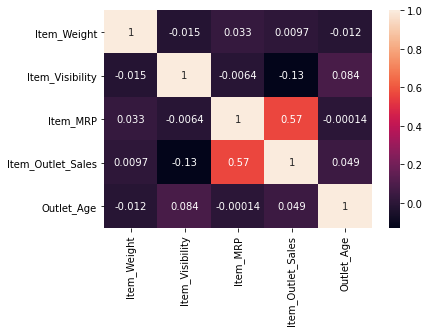

In [234]:
sns.heatmap(data.corr(),annot=True)

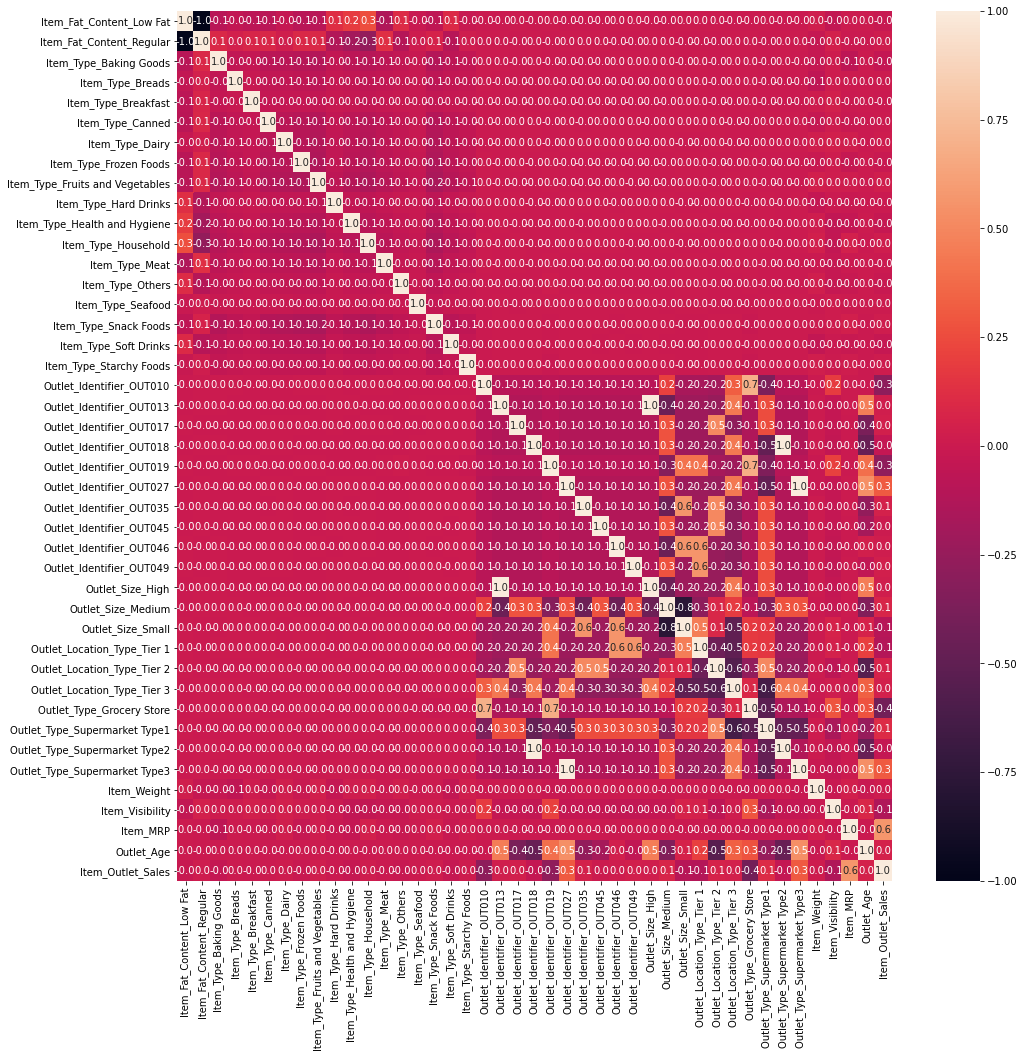

In [238]:
plt.figure(figsize=(16,16))
sns.heatmap(final_preprocessed.corr(),annot=True,fmt='.1f')
plt.show()

In [ ]:
data=x.copy()